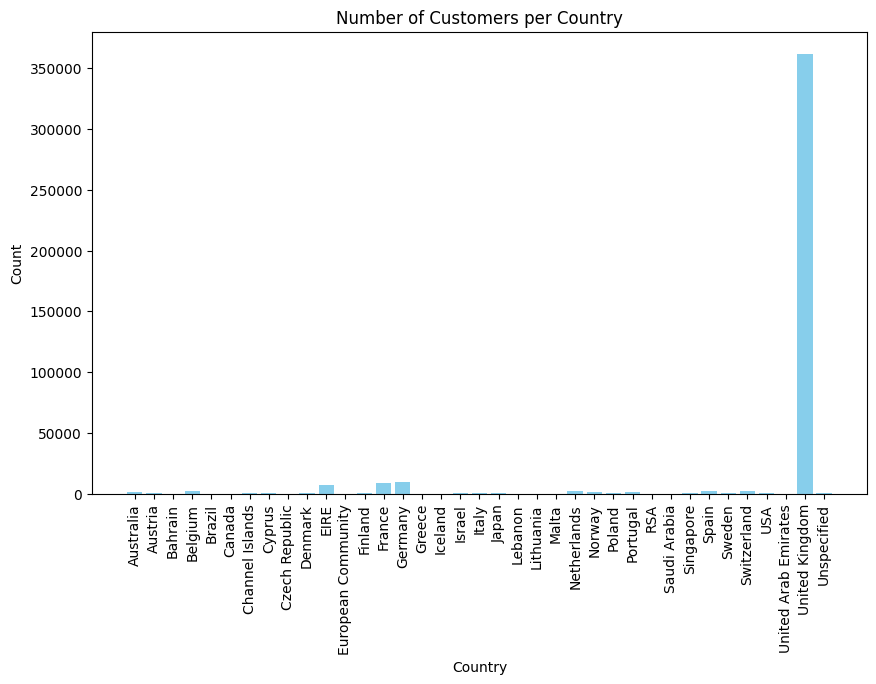

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score
df=pd.read_csv('data.csv')

df =df.dropna(subset=['Description','CustomerID'])

df.head()
# Grouping by 'Country' and counting the occurrences
count = df.groupby('Country').size().reset_index(name='Count')

# Plotting the bar chart
plt.figure(figsize=(10,6))
plt.bar(count['Country'], count['Count'], color='skyblue')

# Setting labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Number of Customers per Country')
plt.xticks(rotation=90)  # Rotate country names for better readability

# Display the plot
plt.show()

In [5]:
print(len(df.Description.unique()))

3896


In [ ]:

numbers=df.groupby('Description').size().reset_index(name='numbers')
# Plotting the bar chart
plt.figure(figsize=(400,100))
plt.bar(numbers['Description'], numbers['numbers'], color='skyblue')
# Setting labels and title
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.title('Number of sale per Product')
plt.xticks(rotation=90)  # Rotate country names for better readability

# Display the plot
plt.show()

In [ ]:
UK=df[df['Country']=='United Kingdom']
quant=UK.groupby('Description').size().reset_index(name='quant')
# Plotting the bar chart
plt.figure(figsize=(400,100))
plt.bar(quant['Description'], quant['quant'], color='skyblue')
# Setting labels and title
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.title('UK most common product')
plt.xticks(rotation=90)  # Rotate country names for better readability

# Display the plot
plt.show()

In [18]:
#convert InvoiceDate column to readable data
# Step 1: Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Step 2: Extract relevant features
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df['Minute'] = df['InvoiceDate'].dt.minute
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Minute,Date,time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,0,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,0,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0,8


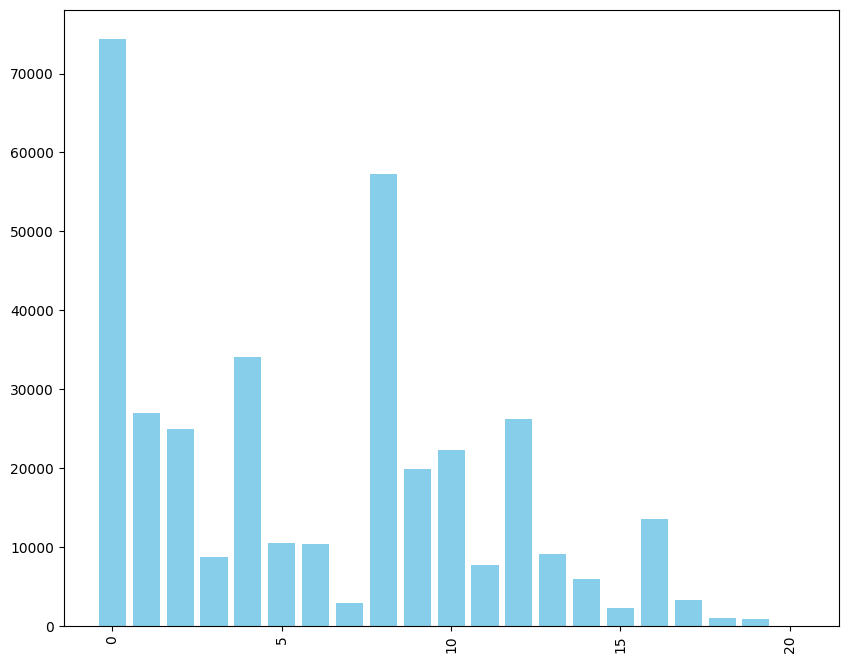

In [48]:
UK=df[df['Country']=='United Kingdom']
time=df.groupby(['Hour','Minute'])
print(time)
A=UK.groupby('time').size().reset_index(name='A')
# Plotting the bar chart
plt.figure(figsize=(10,8))
plt.bar(A['time'], A['A'], color='skyblue')

# Setting labels and title
# plt.xlabel('Products')
# plt.ylabel('Quantity')
# plt.title('UK most common product')
plt.xticks(rotation=90)  # Rotate country names for better readability

# Display the plot
plt.show()

Nhận thấy nhiều người ở Anh có xu hương mua hàng vào lúc 0 h


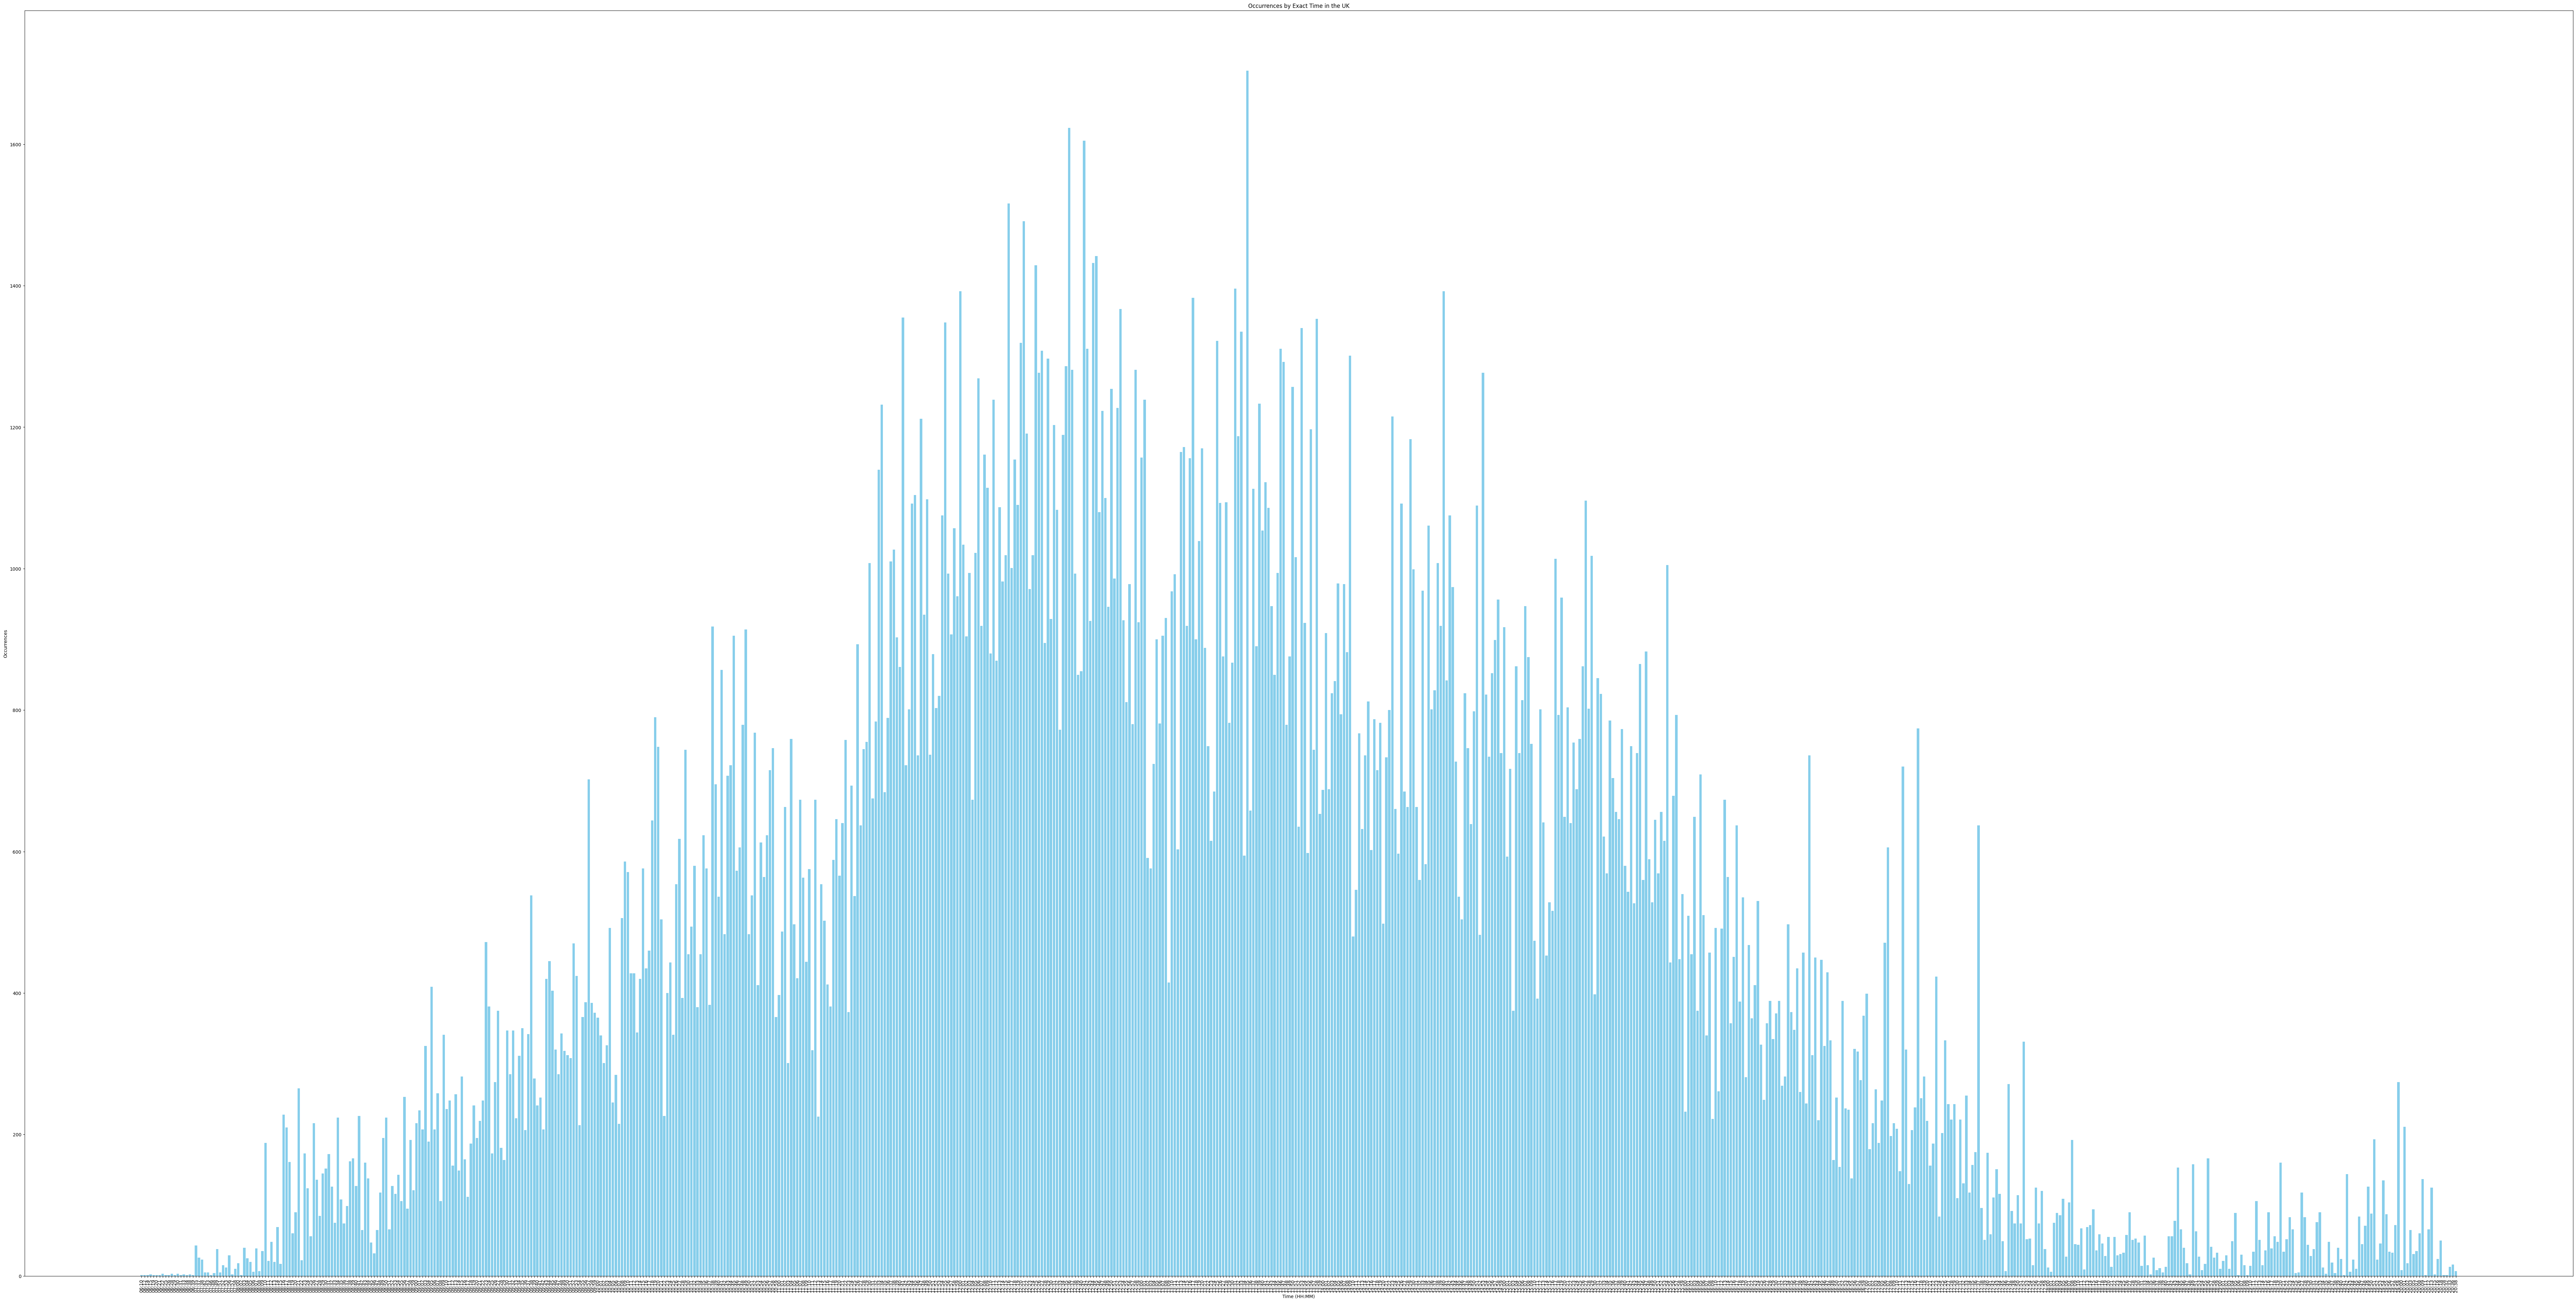

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the DataFrame for the United Kingdom
UK = df[df['Country'] == 'United Kingdom']

# Group by both Hour and Minute
time = UK.groupby(['Hour', 'Minute']).size().reset_index(name='A')

# Combine Hour and Minute into a single column for easier plotting
time['Time'] = time['Hour'].astype(str).str.zfill(2) + ':' + time['Minute'].astype(str).str.zfill(2)

# Plotting the bar chart
plt.figure(figsize=(100,50))
plt.bar(time['Time'], time['A'], color='skyblue')

# Setting labels and title
plt.xlabel('Time (HH:MM)')
plt.ylabel('Occurrences')
plt.title('Occurrences by Exact Time in the UK')
plt.xticks(rotation=90)  # Rotate time labels for better readability

# Display the plot
plt.show()

In [49]:
le = LabelEncoder()
df['Description'] = le.fit_transform(df['Description'])
df['Country'] = le.fit_transform(df['Country'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Minute,Date,time
0,536365,85123A,3716,6,2010-12-01 08:26:00,2.55,17850.0,35,2010,12,1,8,26,0,8
1,536365,71053,3724,6,2010-12-01 08:26:00,3.39,17850.0,35,2010,12,1,8,26,0,8
2,536365,84406B,861,8,2010-12-01 08:26:00,2.75,17850.0,35,2010,12,1,8,26,0,8
3,536365,84029G,1813,6,2010-12-01 08:26:00,3.39,17850.0,35,2010,12,1,8,26,0,8
4,536365,84029E,2776,6,2010-12-01 08:26:00,3.39,17850.0,35,2010,12,1,8,26,0,8


In [ ]:
X=df.drop(['InvoiceNo','StockCode','Year','Month','Day','Hour','Minute','Date','time','InvoiceDate'],axis=1)
y=df['Hour',]